In [41]:
import numpy as np
import pandas as pd
from brokenaxes import brokenaxes
import pfb_functions as pfn
from matplotlib.lines import Line2D

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 10}



In [2]:
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
plt.rc('font', **font)
np.set_printoptions(precision=4, suppress=True)

# Functions (remove the outliers, reading pfb file)

In [3]:
# # funtion of removing the outliers, actually just wanna remove those with extream values
# def remove_outlier(df_in):
#     q1 = df_in.quantile(0.008)
#     q3 = df_in.quantile(0.992)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in[(df_in > fence_low) & (df_in < fence_high)]
#     return df_out

In [4]:
# function of smooth the data, removin thing peaks and abrupt changes
def series_smooth(df_in):
    temp_result=df_in.copy()
    for i in range(len(df_in)):
        if i==0 or i==699:
            temp_result[i]=df_in[i]
        else:
            if (temp_result[i-1]-df_in[i])/temp_result[i-1]>0.1 or (temp_result[i-1]-df_in[i])/temp_result[i-1]<-0.1:
                temp_result[i]= (temp_result[i-1]+df_in[i+1])/2  
            else:
                temp_result[i]=df_in[i]
    return temp_result

In [5]:
# # function of reading pfb file
# # -*- coding: utf-8 -*-
# """
# Created on Wed Mar 11 16:24:38 2015

# @author: Miguel Aguayo
# """
# import struct
# import numpy as np

# def pfb_read(fn):
#     with open(fn,'r') as fid:
#         x1 = np.fromfile(fid,dtype='>f8', count=1)
#         y1 = np.fromfile(fid,dtype='>f8', count=1)
#         z1 = np.fromfile(fid,dtype='>f8', count=1)
#         nx = np.fromfile(fid,dtype='>i4', count=1)
#         ny = np.fromfile(fid,dtype='>i4', count=1)
#         nz = np.fromfile(fid,dtype='>i4', count=1)
#         dx = np.fromfile(fid,dtype='>f8', count=1)
#         dy = np.fromfile(fid,dtype='>f8', count=1)
#         dz = np.fromfile(fid,dtype='>f8', count=1)
#         ns = np.fromfile(fid,dtype='>i4', count=1)
#         var = np.empty((np.int(ny),np.int(nx),np.int(nz)))
        
#         for i0 in range(ns):
#             ix = np.fromfile(fid,dtype='>i4', count=1)
#             iy = np.fromfile(fid,dtype='>i4', count=1)
#             iz = np.fromfile(fid,dtype='>i4', count=1)
        
#             nnx = np.fromfile(fid,dtype='>i4', count=1)
#             nny = np.fromfile(fid,dtype='>i4', count=1)
#             nnz = np.fromfile(fid,dtype='>i4', count=1)
       
#             rx = np.fromfile(fid,dtype='>i4', count=1) 
#             ry = np.fromfile(fid,dtype='>i4', count=1)
#             rz = np.fromfile(fid,dtype='>i4', count=1)
            
#             for k in range(iz,iz+nnz):
#                 for i in range(iy,iy+nny):
#                     for j in range(ix,ix+nnx):
#                         var[i,j,k]=np.fromfile(fid,dtype='>f8', count=1)
#         return var    

# Reading the data

In [6]:
case_namelist = ['pf1_base1','pf1_base5','pf1_base10','pf1_base20','pf1_base40',
                 'pf2_base1','pf2_base5','pf2_base10','pf2_base20','pf2_base40']
# read the water storage that have been calculated and saved in csv file for soil and saprolite, for each of the saprolite thickness cases
sfpath = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite/postprocessing/subsurfacestorage_cal'
outputfile_soilname = 'pf_soil_storage.csv'
outputfile_saproname = 'pf_sapro_storage.csv'


df_soil = pd.read_csv('%s/%s' %(sfpath,outputfile_soilname),names=case_namelist)
max_soil=pd.DataFrame(df_soil.max(),
                  index=np.arange(0, 700, 1))

df_sapro = pd.read_csv('%s/%s' %(sfpath,outputfile_saproname),names=case_namelist)
max_sapro=pd.DataFrame(df_sapro.max(),
                  index=np.arange(0, 700, 1))

#read waterpressure from a specifc time from a pfb file
output_path = '/home/chaochen/payette/chaochen/CZO/Chao/Demonstration_example/landlab_Const.Saprolite'



# Computation, applying functions

### Computation, clean the data apply the functions (note: array may work better, for let it be for now)

In [7]:
# df_soil_smooth=pd.DataFrame(np.random.randint(low=0, high=10, size=(700, 10)),columns=case_namelist)
df_soil_final=pd.DataFrame(np.random.randint(low=0, high=10, size=(700, 10)),columns=case_namelist)
df_sapro_final=pd.DataFrame(np.random.randint(low=0, high=10, size=(700, 10)),columns=case_namelist)

In [8]:
# finalze the soil storage and saprolite storage,remove the outlier by calling the function
for i in range(10):
    name_index=case_namelist[i]
#     temp= remove_outlier(df_soil[name_index])
#     df_soil_smooth[name_index]=remove_outlier(df_soil[name_index])
#     print df_soil_smooth[name_index]
#     print name_index
# remove the peaks ad absrupt changes by calling the function
    df_soil_final[name_index]=series_smooth(df_soil[name_index])
    df_sapro_final[name_index]=series_smooth(df_sapro[name_index])
    
# finalize the total subsurface water storage    
df_water_total=df_sapro_final+df_soil_final


In [9]:
# compute the residence time=storage/discharge, the discahrge here equals to precipitation 1mm/hr(24mm/d,0.024m/d) under steadystate
tau=df_water_total.iloc[[-1]]/0.024
# print (tau)

In [10]:
# compute the Q/P and ET/P for two watershed

In [71]:
# read the pressure data by applying the function
time_spec='00200'
press_pfb= ("%s/outputs_pf1_base20/pf1_base20.out.press.%s.pfb" %(output_path,time_spec))
press = pfn.read(press_pfb)

(16, 198)
(16, 198)


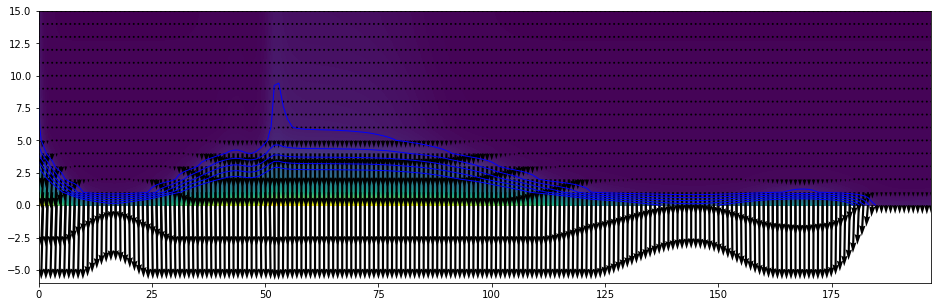

<function matplotlib.pyplot.close(fig=None)>

In [123]:
# print (press)
vertical_slice=press[50,:,:].copy()

n_col=vertical_slice.shape[0]
n_row=vertical_slice.shape[1]
 
fig=plt.figure(figsize=(16,5))
xx,yy=np.meshgrid(np.arange(198),np.arange(16))
print (xx.shape)
print (yy.shape)
l = np.arange(5)
zz=vertical_slice.T
n=200
gradx, grady = np.gradient (vertical_slice,30,5)

# # plot the contour color
plt.contourf(xx, yy, zz, n)
# # plot the contour lines
plt.contour(xx, yy, zz, levels = l, colors = 'b', linewidths = 1, linestyles = 'solid')
# plot the gradient vector woth arrow
plt.quiver(xx, yy, gradx.T, grady.T)
plt.ylim(-6,15)
plt.savefig('profile_press_grad.png')
plt.show()
plt.close


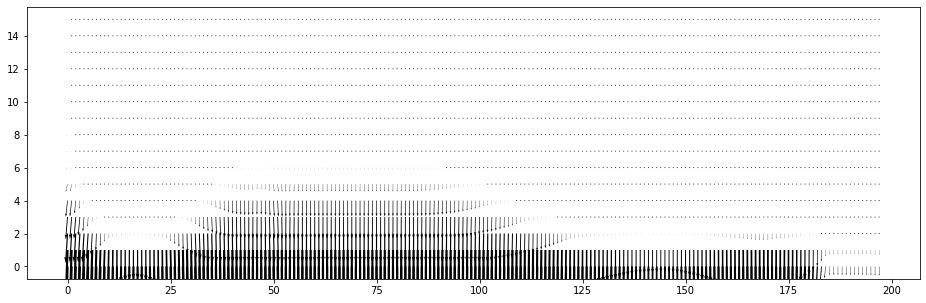

In [110]:
# gradx_min=gradx.min()
# gradx_max=gradx.max()
# gradx_norm=(gradx-gradx_min)/(gradx_max-gradx_min)

# grady_min=grady.min()
# grady_max=grady.max()
# grady_norm=(grady-grady_min)/(grady_max-grady_min)

# # widths = np.linspace(0, 50, gradx_norm.size)
# fig=plt.figure(figsize=(16,5))
# plt.quiver(xx, yy, gradx.T, grady.T, linewidths=1,minshaft=5,minlength=0.5)
# # plt.quiver(xx, yy, gradx_norm.T, grady_norm.T)

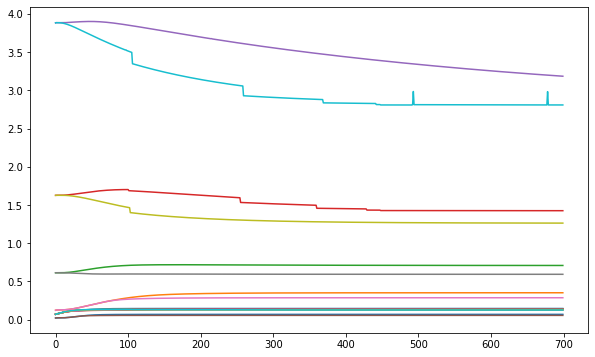

In [111]:
plt.plot(df_soil_final)
plt.plot(df_sapro_final)

In [112]:
print (range(16))
np.arange(0,16)


range(0, 16)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

### computation, find the day of reaching the maxmum saruration in soil and saprolite

In [113]:
# initate the data
soil_sat_max=df_soil_final.max()
sapro_sat_max=df_sapro_final.max()

soil_sat_max_day=np.ones((10,1))
sapro_sat_max_day=np.ones((10,1))

In [114]:
# find the day of reaching the maxmum soil saruration, also for tsaprolite as well
for i in range(10):
    case_index=case_namelist[i]
    # for soil
    soil_sat_temp=df_soil_final[case_index].copy()
    soil_sat_max_temp=soil_sat_max[i].copy()
    temp_soil=soil_sat_temp[soil_sat_temp==soil_sat_max_temp].index.tolist()
    soil_sat_max_day[i]=temp_soil[0]
    # for saprolite
    sapro_sat_temp=df_sapro_final[case_index].copy()
    sapro_sat_max_temp=sapro_sat_max[i].copy()
    temp_sapro=sapro_sat_temp[sapro_sat_temp==sapro_sat_max_temp].index.tolist()
    sapro_sat_max_day[i]=temp_sapro[0]
    
# for soil
soil_sat_min_end=df_soil_final.iloc[[-1]].copy()
soil_sat_min_end=soil_sat_min_end.to_numpy()
# for saprolite
sapro_sat_min_end=df_sapro_final.iloc[[-1]].copy()
sapro_sat_min_end=sapro_sat_min_end.to_numpy()

In [115]:
print (soil_sat_max_day)
i=0
name_index=case_namelist[i]
print (name_index)
print (df_soil_final[name_index])

soil_sat_temp=df_soil_final[name_index].copy()
print (soil_sat_temp)
soil_sat_max_temp=soil_sat_max[i].copy()
print (soil_sat_max_temp)
for i in range(len(soil_sat_temp)):
    print (i)
    print (i, soil_sat_temp[i])
    if soil_sat_temp[i] == soil_sat_max_temp:
        print (soil_sat_temp[i])
        exit
    else:
        continue
# soil_sat_temp[np.where(np.to_array(soil_sat_max)>0)]
# temp_soil=soil_sat_temp[soil_sat_temp==soil_sat_max_temp].index.tolist()

# print (temp_soil)

[[378.]
 [699.]
 [250.]
 [195.]
 [166.]
 [283.]
 [699.]
 [235.]
 [ 95.]
 [ 80.]]
pf1_base1
0      0.069577
1      0.072017
2      0.074457
3      0.076994
4      0.079548
         ...   
695    0.145145
696    0.145145
697    0.145145
698    0.145145
699    0.145145
Name: pf1_base1, Length: 700, dtype: float64
0      0.069577
1      0.072017
2      0.074457
3      0.076994
4      0.079548
         ...   
695    0.145145
696    0.145145
697    0.145145
698    0.145145
699    0.145145
Name: pf1_base1, Length: 700, dtype: float64
0.1451451180319273
0
0 0.06957710711843478
1
1 0.07201728681977856
2
2 0.07445746652112235
3
3 0.0769941782756694
4
4 0.0795484536877122
5
5 0.08208723105010396
6
6 0.08458699235271361
7
7 0.08703482571254502
8
8 0.0894213634374324
9
9 0.09173715740177828
10
10 0.09397327045216766
11
11 0.09612198409251019
12
12 0.09816998387474768
13
13 0.10013541268000119
14
14 0.10199474376710976
15
15 0.10375495495143783
16
16 0.10541641391616925
17
17 0.10697946186324432
18


486
486 0.1451451180319273
0.1451451180319273
487
487 0.1451370224806333
488
488 0.1451451180319273
0.1451451180319273
489
489 0.1451451180319273
0.1451451180319273
490
490 0.1451451180319273
0.1451451180319273
491
491 0.1451451180319273
0.1451451180319273
492
492 0.1451451180319273
0.1451451180319273
493
493 0.1451451180319273
0.1451451180319273
494
494 0.1451409704137809
495
495 0.1451409704137809
496
496 0.1451451180319273
0.1451451180319273
497
497 0.1451451180319273
0.1451451180319273
498
498 0.1451451180319273
0.1451451180319273
499
499 0.1451451180319273
0.1451451180319273
500
500 0.1451451180319273
0.1451451180319273
501
501 0.1451451180319273
0.1451451180319273
502
502 0.1451451180319273
0.1451451180319273
503
503 0.1451451180319273
0.1451451180319273
504
504 0.1451451180319273
0.1451451180319273
505
505 0.1451451180319273
0.1451451180319273
506
506 0.1451451180319273
0.1451451180319273
507
507 0.1451451180319273
0.1451451180319273
508
508 0.1451451180319273
0.1451451180319273

In [17]:
print (sapro_sat_min_end)

[[0.0684 0.3512 0.7083 1.425  3.1846 0.0552 0.2859 0.5927 1.2625 2.8085]]


## Plot

### plot, water content comparisons between cases 1, 5, 10 and cases 20, 40, and in soil and saprolite

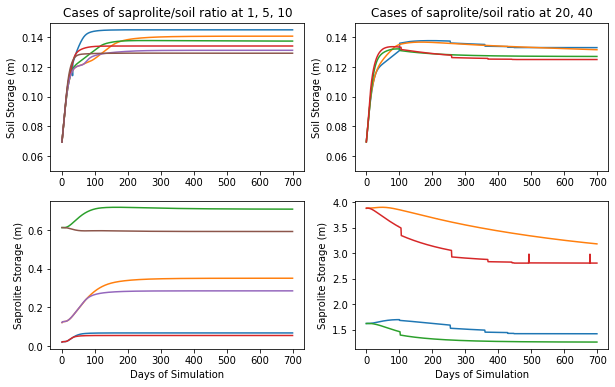

<function matplotlib.pyplot.close(fig=None)>

In [116]:
###### for component water volumn plots, volumn in soil and saprolite
fig = plt.figure()

# plot, soil
soil_1510=fig.add_subplot(2, 2, 1)
plt.plot(df_soil_final.iloc[:,[0,1,2,5,6,7]])
plt.ylim(0.05,0.15)
plt.ylabel("Soil Storage (m)")
soil_1510.set_title("Cases of saprolite/soil ratio at 1, 5, 10")

soil_2040=fig.add_subplot(2, 2, 2)
plt.plot(df_soil_final.iloc[:,[3,4,8,9]])
plt.ylim(0.05,0.15)
# plt.xlabel("Days of Simulation")
plt.ylabel("Soil Storage (m)")
soil_2040.set_title("Cases of saprolite/soil ratio at 20, 40")

# plot, saprolite
fig.add_subplot(2, 2, 3)
plt.plot(df_sapro_final.iloc[:,[0,1,2,5,6,7]])
plt.ylabel("Saprolite Storage (m)")
plt.xlabel("Days of Simulation")
fig.add_subplot(2, 2, 4)
plt.plot(df_sapro_final.iloc[:,[3,4,8,9]])
plt.ylabel("Saprolite Storage (m)")
plt.xlabel("Days of Simulation")
plt.savefig('WaterContentComparisons.png')
plt.show()
plt.close


### plot the sum of soil and sparolite water storage

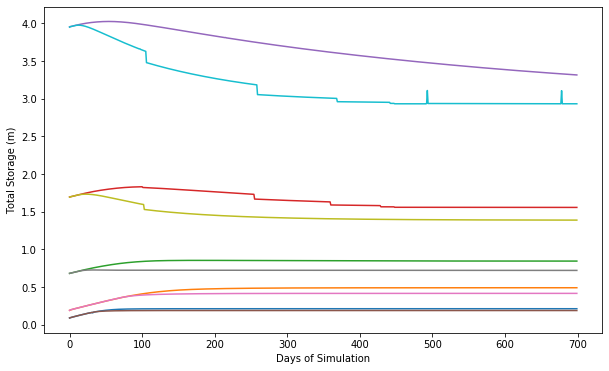

<function matplotlib.pyplot.close(fig=None)>

In [117]:
###### plot the sum of soil and sparolite water storage
fig = plt.figure()
plt.plot(df_water_total.iloc[:,0:5])
plt.plot(df_water_total.iloc[:,5:10])
plt.ylabel("Total Storage (m)")
plt.xlabel("Days of Simulation")

plt.savefig('totalWaterStorage.png')
plt.show()
plt.close

### plot the residence time

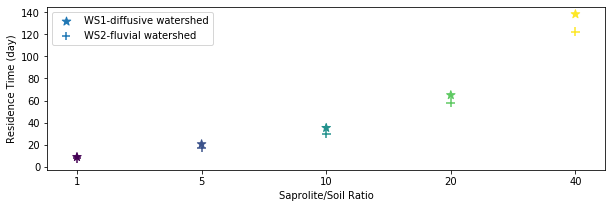

In [24]:
fig = plt.figure(figsize=(10,3))
scatter=plt.scatter(['1', '5', '10', '20', '40'],tau.iloc[:,0:5], c=range(5),label="WS1-diffusive watershed",marker='*',s=80)
# plt.plot(['1', '5', '10', '20', '40'],tau.iloc[:,0:5].T)
plt.scatter(['1', '5', '10', '20', '40'],tau.iloc[:,5:10], c=range(5,10,1),label="WS2-fluvial watershed",marker='+',s=80)
# plt.plot(['1', '5', '10', '20', '40'],tau.iloc[:,5:10].T)
plt.ylabel("Residence Time (day)")
plt.xlabel("Saprolite/Soil Ratio")
plt.legend(loc='best')
plt.savefig('ResidenceTime.png')
plt.show()

In [ ]:
# print(df_sapro_final[:,0])

### plot the Day reaching to the maximum water content

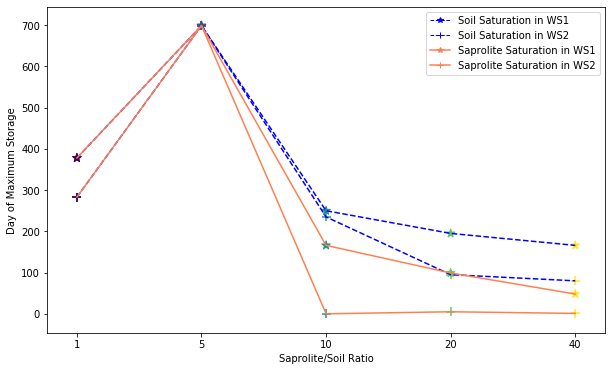

<function matplotlib.pyplot.close(fig=None)>

In [119]:
################################################################
#  plot the day when is was reached maximum water content, for all cases

###### for soil
fig = plt.figure()
# ax = fig.add_subplot(2,1, 1)
ax = fig.add_subplot(1,1, 1)
# plot
scatter=plt.scatter(['1', '5', '10', '20', '40'],soil_sat_max_day[0:5], c=range(5),label="WS1-diffusive watershed",marker='*',s=80)
plt.plot(['1', '5', '10', '20', '40'],soil_sat_max_day[0:5],'--', color='b')
plt.scatter(['1', '5', '10', '20', '40'],soil_sat_max_day[5:10], c=range(5,10,1),label="WS2-fluvial watershed",marker='+',s=80)
plt.plot(['1', '5', '10', '20', '40'],soil_sat_max_day[5:10],'--', color='b')
plt.ylabel("Day of Maximum Saturation")
plt.xlabel("Saprolite/Soil Ratio")
# # produce a legend with a cross section of sizes from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),loc="upper right", title="Cases")
# ax.add_artist(legend1)
custom_lines = [Line2D([0], [0], color='b', lw=1,linestyle='--',marker='*'),
                Line2D([0], [0], color='b', lw=1,linestyle='--',marker='+'),
               Line2D([0], [0], color='coral', marker='*'),
               Line2D([0], [0], color='coral', marker='+')]
plt.legend(custom_lines,['Soil Saturation in WS1', 'Soil Saturation in WS2',
                         'Saprolite Saturation in WS1', 'Saprolite Saturation in WS2'],loc='upper right')
# plt.savefig('MaxSatDay_soil.png')
# plt.show()


###### for saprolite
# bx=ax.twinx()
# bx = fig.add_subplot(2,1, 2)

# plot
scatter=plt.scatter(['1', '5', '10', '20', '40'],sapro_sat_max_day[0:5], c=range(5),label="WS1-diffusive watershed",marker='*',s=80)
plt.plot(['1', '5', '10', '20', '40'],sapro_sat_max_day[0:5], color='coral')
plt.scatter(['1', '5', '10', '20', '40'],sapro_sat_max_day[5:10], c=range(5,10,1),label="WS2-fluvial watershed",marker='+',s=80)
plt.plot(['1', '5', '10', '20', '40'],sapro_sat_max_day[5:10], color='coral')
plt.ylabel("Day of Maximum Storage")
plt.xlabel("Saprolite/Soil Ratio")
# # produce a legend with a cross section of sizes from the scatter
# legend1 = bx.legend(*scatter.legend_elements(),loc='upper right', title="Cases")
# bx.add_artist(legend1)
# plt.legend(loc='upper right')
plt.savefig('MaxSatDay.png')
plt.show()
plt.close


In [ ]:
soil_sat_max

### plot the Day reaching to the maximum water content

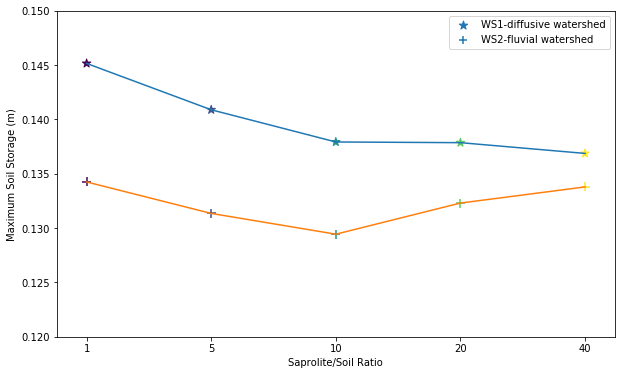

In [26]:
################################################################
#  plot the maximum water content it reached, for all cases

###### for soil
fig = plt.figure()
ax = fig.add_subplot( 1, 1,1)
# plot
scatter=plt.scatter(['1', '5', '10', '20', '40'],soil_sat_max[0:5], c=range(5),label="WS1-diffusive watershed",marker='*',s=80)
plt.plot(['1', '5', '10', '20', '40'],soil_sat_max[0:5])
plt.scatter(['1', '5', '10', '20', '40'],soil_sat_max[5:10], c=range(5,10,1),label="WS2-fluvial watershed",marker='+',s=80)
plt.plot(['1', '5', '10', '20', '40'],soil_sat_max[5:10])
plt.ylim(0.12,0.15)
plt.ylabel("Maximum Soil Storage (m)")
plt.xlabel("Saprolite/Soil Ratio")
# # produce a legend with a cross section of sizes from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Cases")
# ax.add_artist(legend1)
plt.legend(loc='upper right')
plt.savefig('MaxSat_soil.png')
plt.show()

# ###### for saprolite

# # ax = fig.add_subplot(1,2, 2)
# bx=ax.twinx()
# # plot
# scatter=plt.scatter(['1', '5', '10', '20', '40'],sapro_sat_max[0:5], c=range(5),label="WS1-diffusive watershed",marker='*',s=80)
# plt.plot(['1', '5', '10', '20', '40'],sapro_sat_max[0:5])
# plt.scatter(['1', '5', '10', '20', '40'],sapro_sat_max[5:10], c=range(5,10,1),label="WS2-fluvial watershed",marker='+',s=80)
# plt.plot(['1', '5', '10', '20', '40'],sapro_sat_max[5:10])
# plt.ylabel("Maximum Saprolite Storage (m)")
# plt.xlabel("Saprolite/Soil Ratio")
# # # produce a legend with a cross section of sizes from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),loc='lower right', title="Cases")
# ax.add_artist(legend1)
# plt.legend(loc='upper left')
# plt.savefig('MaxSat.png')
# plt.show()
# plt.close

### plot, steady state water content

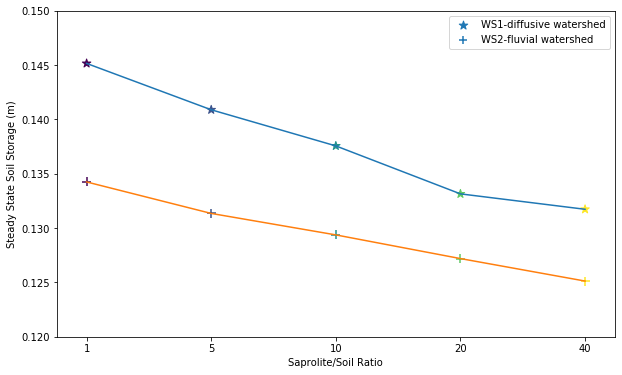

In [118]:
################################################################
#  plot the water content at seady state, for all cases
# for soil
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

scatter=plt.scatter(['1', '5', '10', '20', '40'],soil_sat_min_end[:,0:5], label="WS1-diffusive watershed",c=range(5),marker='*',s=80)
plt.plot(['1', '5', '10', '20', '40'],soil_sat_min_end[:,0:5].T)
plt.scatter(['1', '5', '10', '20', '40'],soil_sat_min_end[:,5:10], label="WS2-fluvial watershed",c=range(5),marker='+',s=80)
plt.plot(['1', '5', '10', '20', '40'],soil_sat_min_end[:,5:10].T)
plt.ylim(0.12,0.15)
plt.xlabel("Saprolite/Soil Ratio")
plt.ylabel("Steady State Soil Storage (m)")
# put legend
# legend1 = ax.legend(*scatter.legend_elements(),loc='upper right', title="Cases")
# ax.add_artist(legend1)
plt.legend(loc='upper right')
plt.savefig('SteadStateSat_soil.png')
plt.show()
plt.close()

# # for sapro
# # ax = fig.add_subplot(1,2, 2)
# bx=ax.twinx()
# scatter=plt.scatter(['1', '5', '10', '20', '40'],sapro_sat_min_end[:,0:5], label="WS1-diffusive watershed",c=range(5),marker='*',s=80)
# plt.plot(['1', '5', '10', '20', '40'],sapro_sat_min_end[:,0:5].T)
# plt.scatter(['1', '5', '10', '20', '40'],sapro_sat_min_end[:,5:10], label="WS2-fluvial watershed",c=range(5),marker='+',s=80)
# plt.plot(['1', '5', '10', '20', '40'],sapro_sat_min_end[:,5:10].T)
# plt.xlabel("Saprolite/Soil Ratio")
# plt.ylabel("Steady State Saprolite Storage (m)")
# # put legend
# legend1 = ax.legend(*scatter.legend_elements(),loc='upper right', title="Cases")
# ax.add_artist(legend1)
# plt.legend(loc='upper left')
# plt.savefig('SteadStateSat.png')
# plt.show()
# plt.close()